In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

<h1> Load and check dataset

In [17]:
df = pd.read_csv('../dataset/Country-data.csv', sep=',', decimal='.')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [18]:
df.shape

(167, 10)

In [19]:
# Check if there is null data
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [20]:
# Check if there is duplicated data
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<h1> Checking dataset values range

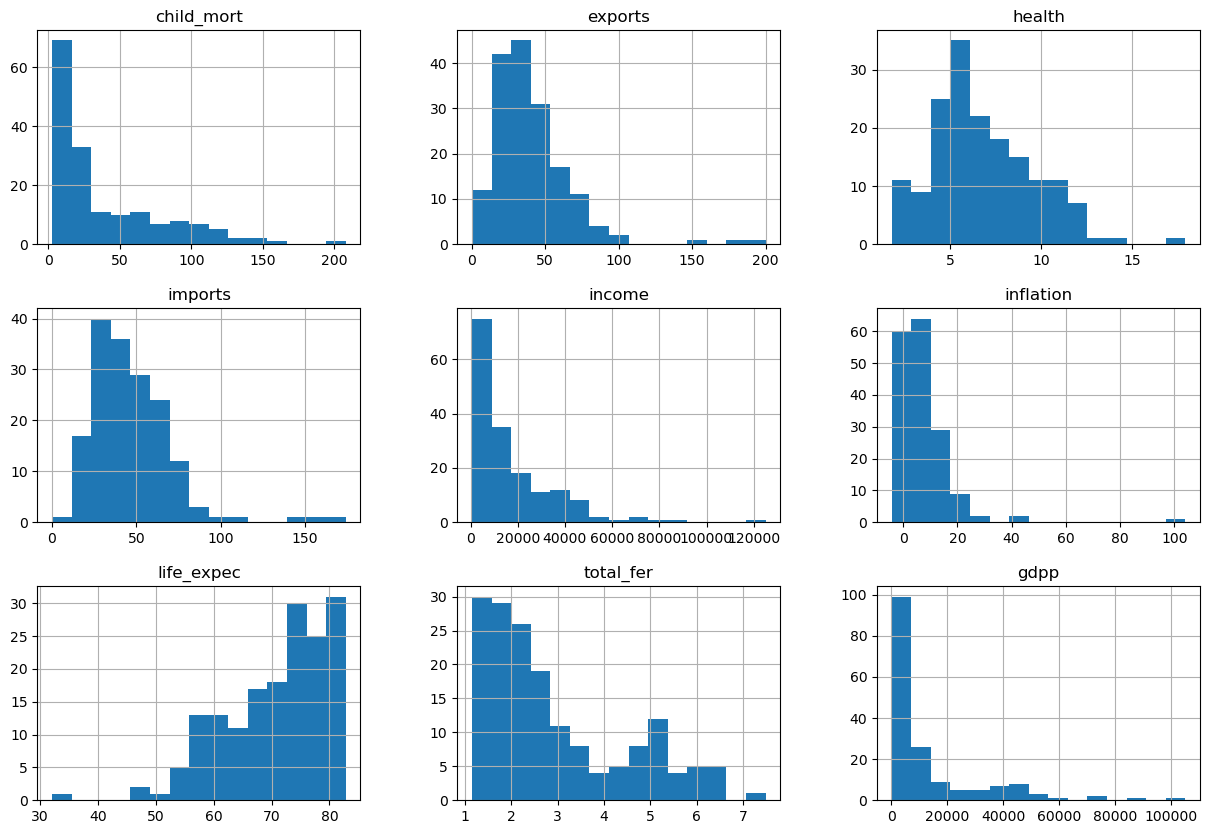

In [22]:
df.hist(figsize=(15, 10), bins=15)
plt.show()

<h1> Normalizing dataset

In [23]:
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 
                    'inflation', 'life_expec', 'total_fer', 'gdpp']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

# Dimensionality Reduction using PCA for visualization purposes
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

In [24]:
# le = LabelEncoder()
# normalized = df.copy()
# normalized['country'] = le.fit_transform(normalized['country'])

# Scaling all the features values
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(normalized)
# scaled_data

<h1> Apply Kmeans

In [25]:
k_cluster = 3
kmeans = KMeans(n_clusters=k_cluster,random_state=42)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [26]:
df['Cluster'] = kmeans.labels_
# pd.set_option('display.max_rows', None)
df[['country', 'Cluster']]

,country,Cluster
0,Afghanistan,2
1,Albania,0
2,Algeria,0
3,Angola,2
4,Antigua and Barbuda,0
...,...,...
162,Vanuatu,0
163,Venezuela,0
164,Vietnam,0
165,Yemen,2


/opt/miniconda3/envs/infnet-ml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


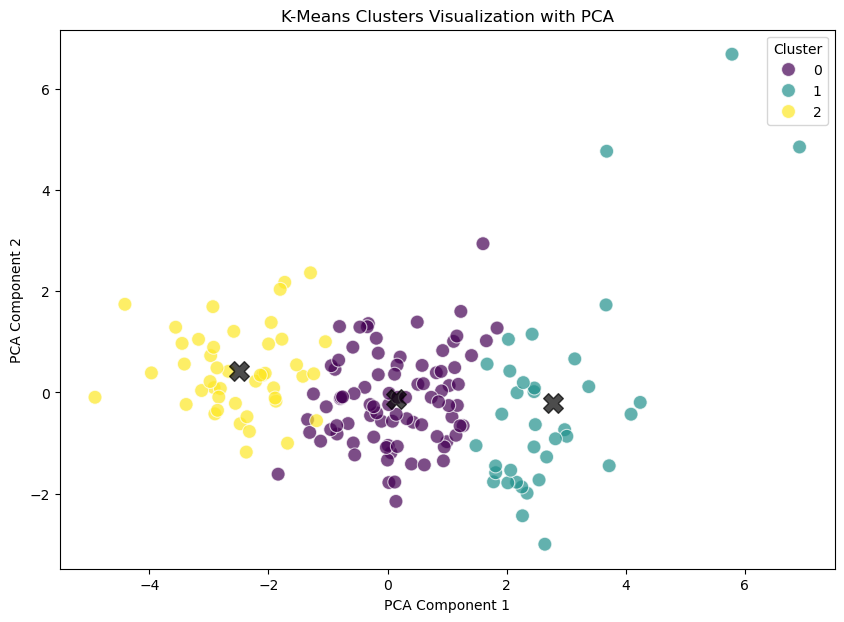

In [27]:
centroids_pca = pca.transform(kmeans.cluster_centers_)
visual_df = pd.concat([pca_df, df['Cluster']], axis=1)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=visual_df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, alpha=0.7, marker='X', label='Centroids')
plt.show()


In [28]:
from sklearn.metrics import silhouette_score


# Calcule o Silhouette Score usando as previsões de cluster (y_kmeans) e os dados de entrada originais (sem PCA)
silhouette_avg_pca = silhouette_score(pca_df, y_kmeans)
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")

Silhouette Score (PCA): 0.3796616889860103


Silhouette Score for K=3: 0.2856


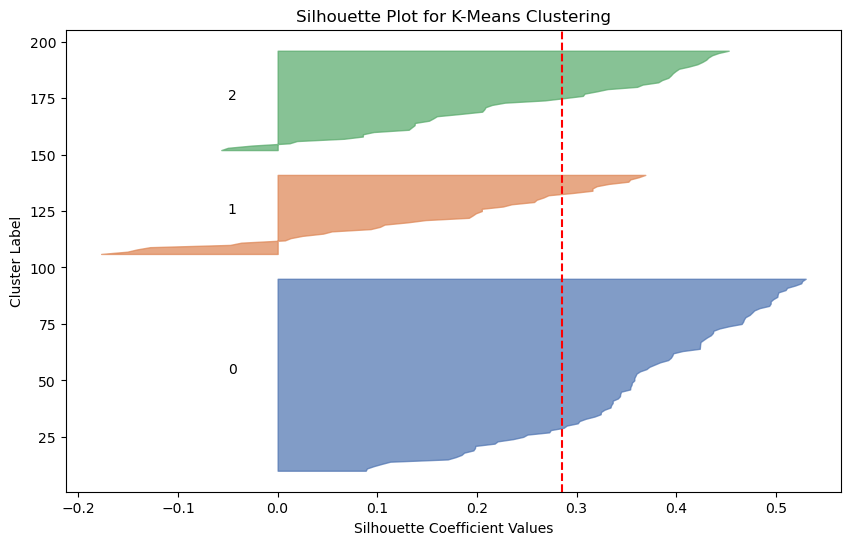

In [29]:
# Calculate Silhouette Score for the optimal K
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score for K=3: {silhouette_avg:.4f}')

# Detailed Silhouette Analysis
sample_silhouette_values = silhouette_samples(scaled_df, kmeans.labels_)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k_cluster):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = sns.color_palette("deep")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

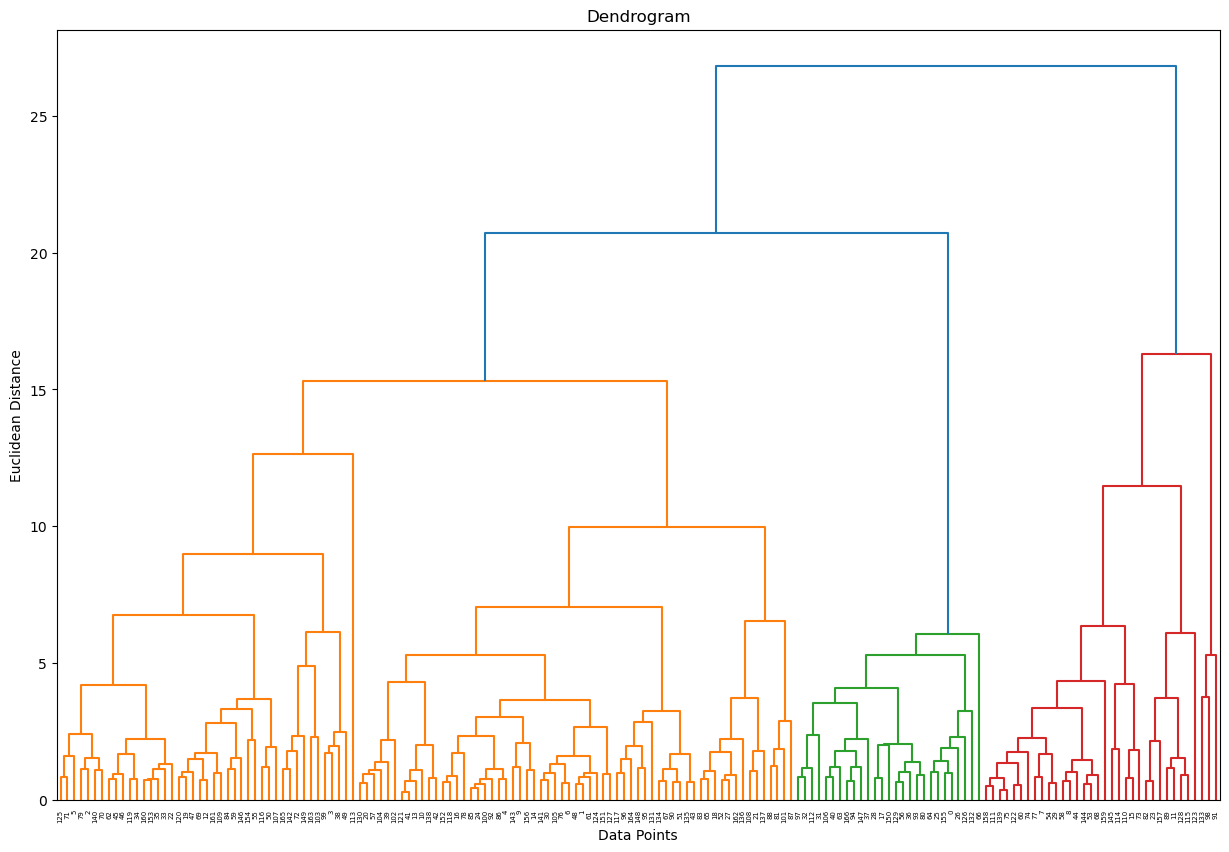

In [30]:
linked = linkage(scaled_data, method='ward')  # 'ward' minimize variance

# Plot dendogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()